Buatlah class untuk algoritma Linear Regression, dengan ketentuan sebagai berikut :
1.  Terdapat method fit yang digunakan untuk proses pembelajaran dengan parameter utama adalah pasangan fitur dan target, jumlah epoch
2. Update Bobot yang digunakan adalah Offline Learning
3. Terdapat method predict yang digunakan untuk testing dengan parameter berupa data baru dan return value berupa hasil prediksi dengan linear regressi
4. Tambahkan method2 tambahan seperti inisialisasi (constructor), perhitungan kinerja dengan menggunakan r squared, dan display model yang dihasilkan (jika fitur adalah 1 atau 2 dimensi), dan method2 yang dibutuhkan
5. hanya diperbolehkan menggunakan library bantuan numpy dan matplotlib

Yang harus dikumpulkan :
1. Code berupa link colab
2. Laporan yang berisi :
   - Teori Linear Regression, termasuk rumus, algoritma, contoh implementasi
   - Contoh perhitungan manual
   - hasil ujicoba dan analisa

# Linear Regression Direct/Matrix Equation Univariate

Intercept: 0.39999999999999947
Koefisien: 0.8
Mean X: 3.0
Covariance: 2.0
Variance: 2.5


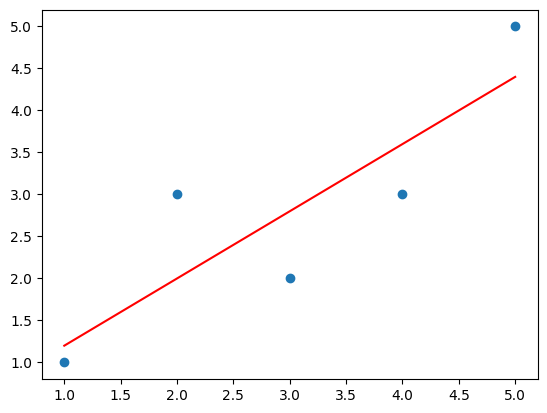

In [92]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionDirectUnivariate:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        meanX = np.mean(X)
        meanY = np.mean(y)
        varX = np.var(X, ddof=1)
        covXY = np.cov(X, y)
        dataCov = covXY[0,1]
        self.weights = dataCov / varX
        self.bias = meanY - self.weights * meanX
    
    def predict(self, X):
        return self.bias + self.weights * X
    
    def display_model(self, X, y):
        plt.plot(X, y, 'o')
        dataX = np.linspace(np.min(X), np.max(X), 20)
        dataY = self.bias + self.weights * dataX
        plt.plot(dataX, dataY, 'r-')
        plt.show()

X = np.array([1, 2, 3, 4, 5])
Y = np.array([1, 3, 2, 3, 5])

linearRegressionModel = LinearRegressionDirectUnivariate()
linearRegressionModel.fit(X, Y)
print("Intercept:", linearRegressionModel.bias)
print("Koefisien:", linearRegressionModel.weights)
print("Mean X:", np.mean(X))
print("Covariance:", np.cov(X, Y)[0,1])
print("Variance:", np.var(X, ddof=1))
linearRegressionModel.display_model(X, Y) 

# Linear Regression Stochastic Gradient Descent (Online Learning)

Epoch- 0  Data: [1 2]  Error: -1.0  w: [0.01 0.01 0.02]
Epoch- 0  Data: [2 3]  Error: -2.91  w: [0.0391 0.0682 0.1073]
Epoch- 0  Data: [4 5]  Error: -2.1516  w: [0.060616 0.154264 0.21488 ]
Epoch- 0  Data: [3 4]  Error: -0.6170719999999998  w: [0.06678672 0.17277616 0.23956288]
Epoch- 0  Data: [5 1]  Error: -3.8297695999999997  w: [0.10508442 0.36426464 0.27786058]
Epoch- 1  Data: [1 2]  Error: 0.025070208000000038  w: [0.10483371 0.36401394 0.27735917]
Epoch- 1  Data: [2 3]  Error: -1.33506089472  w: [0.11818432 0.39071516 0.317411  ]
Epoch- 1  Data: [4 5]  Error: 0.2680999395328003  w: [0.11550332 0.37999116 0.304006  ]
Epoch- 1  Data: [3 4]  Error: 0.4715008049909759  w: [0.11078832 0.36584613 0.28514597]
Epoch- 1  Data: [5 1]  Error: -2.7748350446559233  w: [0.13853667 0.50458789 0.31289432]
Weights: [0.50458789 0.31289432]
Bias: 0.13853666586852148
R2 score: 0.27869118410959437


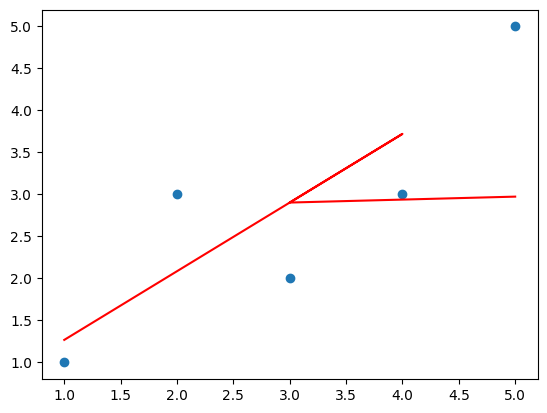

In [93]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for epoch in range(self.epochs):
            for i in range(n_samples):
                y_predicted = np.dot(X[i], self.weights) + self.bias
                
                error = y_predicted - y[i]
                dw = X[i] * error
                db = error
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                w = np.concatenate((np.array([self.bias]), self.weights))
    
                print('Epoch-', epoch, ' Data:', X[i], ' Error:', error, ' w:', w)
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted
    
    def r_squared(self, X, y):
        y_mean = np.mean(y)
        y_predicted = self.predict(X)
        ss_tot = np.sum((y - y_mean)**2)
        ss_res = np.sum((y - y_predicted)**2)
        r2 = 1 - (ss_res / ss_tot)
        return r2
    
    def display_model(self, X, y):
        if X.shape[1] > 2:
            print("Tidak dapat menampilkan model dengan lebih dari 2 fitur")
            return

        x_values = X[:, 0]

        plt.scatter(x_values, y)
        plt.plot(x_values, self.predict(X), color='red')
        plt.show()

X = np.array([[1, 2], [2, 3], [4, 5], [3, 4], [5, 1]])
Y = np.array([1, 3, 3, 2, 5])
linearRegressionModel = LinearRegression(epochs=2, learning_rate=0.01)
linearRegressionModel.fit(X, Y)
print("Weights:", linearRegressionModel.weights)
print("Bias:", linearRegressionModel.bias)
print("R2 score:", linearRegressionModel.r_squared(X, Y))
linearRegressionModel.display_model(X, Y)

# Linear Regression Batch Gradient Descent (Offline Learning)

Epoch- 0  Data: [2 4 2 5 3 1 4 5]  Error: [-10. -12. -12. -16.]  w: [0.125 0.36  0.48 ]
Epoch- 1  Data: [2 4 2 5 3 1 4 5]  Error: [ -7.235  -8.755 -10.315 -12.035]  w: [0.22085   0.6376625 0.8380125]
Weights: [0.6376625 0.8380125]
Bias: 0.22085
R2 score: -11.084485653733552


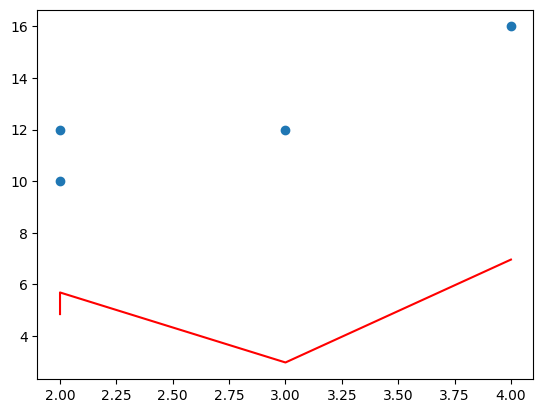

In [94]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for epoch in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            error = y_predicted - y
            dw = (1/n_samples) * np.dot(X.T, error)
            db = (1/n_samples) * np.sum(error)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            w = np.concatenate((np.array([self.bias]), self.weights))
    
            print('Epoch-', epoch, ' Data:', np.concatenate(X), ' Error:', error, ' w:', w)
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted
    
    def score(self, X, y):
        y_mean = np.mean(y)
        y_predicted = self.predict(X)
        ss_tot = np.sum((y - y_mean)**2)
        ss_res = np.sum((y - y_predicted)**2)
        r2 = 1 - (ss_res / ss_tot)
        return r2
    
    def display_model(self, X, y):
        if X.shape[1] > 2:
            print("Tidak dapat menampilkan model dengan lebih dari 2 fitur")
            return

        x_values = X[:, 0]

        plt.scatter(x_values, y)
        plt.plot(x_values, self.predict(X), color='red')
        plt.show()

X = np.array([[2, 4], [2, 5], [3, 1], [4, 5]])
Y = np.array([10, 12, 12, 16])
linearRegressionModel = LinearRegression(epochs=2, learning_rate=0.01)
linearRegressionModel.fit(X, Y)
print("Weights:", linearRegressionModel.weights)
print("Bias:", linearRegressionModel.bias)
print("R2 score:", linearRegressionModel.score(X, Y))
linearRegressionModel.display_model(X, Y)